In [1]:
import models
import model_setup
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split, DataLoader
from tqdm import tqdm
from itertools import product
from datetime import datetime

# Setup data

In [2]:
# Load new data
loader = model_setup.load_data(max_files=30_000)
# torch.save(loader, "preprocessed_data_30_000.pt")

# Load from preprocessed data
# preprocessed_data_path = "preprocessed_data_30_000.pt"
# loader = torch.load(preprocessed_data_path)

Processing Data: 100%|██████████| 30000/30000 [02:25<00:00, 206.55image/s]


Split the data into training, testing, and validation sets

In [3]:
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.6,0.3,0.1])

val_size = len(val_subset.indices)

train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)


# Training

Make a parameter grid

In [4]:
param_grid = {
    'num_conv_layers': [1, 2, 4],
    'filters': [32, 64, 128]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(1, 32),
 (1, 64),
 (1, 128),
 (2, 32),
 (2, 64),
 (2, 128),
 (4, 32),
 (4, 64),
 (4, 128)]

Train all combinations

In [5]:
saved_models = []

for num_layers, filters in combinations:
    print("--------------------------------------------------------")
    print(f"Testing with \"{filters} filters\" and \"{num_layers} layers\"")
    model = models.HandDetectionModel(filters, num_layers)
    model.train_model(train, test, epochs=10)
    torch.save(model.state_dict(), f"models/model_{filters}_{num_layers}_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
    saved_models.append(model)

--------------------------------------------------------
Testing with "32 filters" and "1 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [01:53<00:00,  2.49it/s]


Epoch 1/10, Loss: 1.0982, Time remaining: 0:17:01.179681


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:26<00:00,  5.24it/s]


Validation Loss: 1.0974


Epoch 2/10 (Training): 100%|██████████| 282/282 [01:44<00:00,  2.69it/s]


Epoch 2/10, Loss: 1.0970, Time remaining: 0:16:20.785024


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:37<00:00,  3.71it/s]


Validation Loss: 1.0947


Epoch 3/10 (Training): 100%|██████████| 282/282 [01:44<00:00,  2.71it/s]


Epoch 3/10, Loss: 1.0913, Time remaining: 0:15:03.975856


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:30<00:00,  4.69it/s]


Validation Loss: 1.0857


Epoch 4/10 (Training): 100%|██████████| 282/282 [01:45<00:00,  2.67it/s]


Epoch 4/10, Loss: 1.0803, Time remaining: 0:13:04.854078


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:35<00:00,  3.96it/s]


Validation Loss: 1.0732


Epoch 5/10 (Training): 100%|██████████| 282/282 [01:42<00:00,  2.76it/s]


Epoch 5/10, Loss: 1.0705, Time remaining: 0:11:01.154605


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:27<00:00,  5.14it/s]


Validation Loss: 1.0674


Epoch 6/10 (Training): 100%|██████████| 282/282 [01:32<00:00,  3.06it/s]


Epoch 6/10, Loss: 1.0631, Time remaining: 0:08:40.588360


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.38it/s]


Validation Loss: 1.0589


Epoch 7/10 (Training): 100%|██████████| 282/282 [01:29<00:00,  3.15it/s]


Epoch 7/10, Loss: 1.0561, Time remaining: 0:06:19.459554


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:17<00:00,  8.26it/s]


Validation Loss: 1.0517


Epoch 8/10 (Training): 100%|██████████| 282/282 [01:29<00:00,  3.14it/s]


Epoch 8/10, Loss: 1.0483, Time remaining: 0:04:08.085712


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.28it/s]


Validation Loss: 1.0436


Epoch 9/10 (Training): 100%|██████████| 282/282 [01:30<00:00,  3.10it/s]


Epoch 9/10, Loss: 1.0416, Time remaining: 0:02:02.056820


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.19it/s]


Validation Loss: 1.0425


Epoch 10/10 (Training): 100%|██████████| 282/282 [01:29<00:00,  3.17it/s]


Epoch 10/10, Loss: 1.0372, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.19it/s]


Validation Loss: 1.0356
--------------------------------------------------------
Testing with "64 filters" and "1 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [01:37<00:00,  2.90it/s]


Epoch 1/10, Loss: 1.0979, Time remaining: 0:14:36.222216


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.10it/s]


Validation Loss: 1.0975


Epoch 2/10 (Training): 100%|██████████| 282/282 [01:37<00:00,  2.89it/s]


Epoch 2/10, Loss: 1.0918, Time remaining: 0:14:02.186984


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:25<00:00,  5.46it/s]


Validation Loss: 1.0822


Epoch 3/10 (Training): 100%|██████████| 282/282 [01:42<00:00,  2.75it/s]


Epoch 3/10, Loss: 1.0762, Time remaining: 0:13:10.919717


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:17<00:00,  8.20it/s]


Validation Loss: 1.0696


Epoch 4/10 (Training): 100%|██████████| 282/282 [01:35<00:00,  2.95it/s]


Epoch 4/10, Loss: 1.0619, Time remaining: 0:11:18.001656


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.35it/s]


Validation Loss: 1.0551


Epoch 5/10 (Training): 100%|██████████| 282/282 [01:41<00:00,  2.77it/s]


Epoch 5/10, Loss: 1.0515, Time remaining: 0:09:28.836210


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:22<00:00,  6.41it/s]


Validation Loss: 1.0509


Epoch 6/10 (Training): 100%|██████████| 282/282 [01:35<00:00,  2.94it/s]


Epoch 6/10, Loss: 1.0445, Time remaining: 0:07:37.854976


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.23it/s]


Validation Loss: 1.0442


Epoch 7/10 (Training): 100%|██████████| 282/282 [01:35<00:00,  2.96it/s]


Epoch 7/10, Loss: 1.0367, Time remaining: 0:05:41.809425


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.26it/s]


Validation Loss: 1.0340


Epoch 8/10 (Training): 100%|██████████| 282/282 [01:37<00:00,  2.88it/s]


Epoch 8/10, Loss: 1.0317, Time remaining: 0:03:47.684984


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.32it/s]


Validation Loss: 1.0272


Epoch 9/10 (Training): 100%|██████████| 282/282 [01:34<00:00,  2.98it/s]


Epoch 9/10, Loss: 1.0271, Time remaining: 0:01:53.410546


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.27it/s]


Validation Loss: 1.0217


Epoch 10/10 (Training): 100%|██████████| 282/282 [01:35<00:00,  2.95it/s]


Epoch 10/10, Loss: 1.0182, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.18it/s]


Validation Loss: 1.0153
--------------------------------------------------------
Testing with "128 filters" and "1 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [01:43<00:00,  2.72it/s]


Epoch 1/10, Loss: 1.0969, Time remaining: 0:15:32.556519


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.01it/s]


Validation Loss: 1.0924


Epoch 2/10 (Training): 100%|██████████| 282/282 [01:41<00:00,  2.77it/s]


Epoch 2/10, Loss: 1.0835, Time remaining: 0:14:44.425584


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.30it/s]


Validation Loss: 1.0728


Epoch 3/10 (Training): 100%|██████████| 282/282 [01:42<00:00,  2.76it/s]


Epoch 3/10, Loss: 1.0676, Time remaining: 0:13:10.054825


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.33it/s]


Validation Loss: 1.0597


Epoch 4/10 (Training): 100%|██████████| 282/282 [01:40<00:00,  2.82it/s]


Epoch 4/10, Loss: 1.0547, Time remaining: 0:11:20.682192


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.16it/s]


Validation Loss: 1.0522


Epoch 5/10 (Training): 100%|██████████| 282/282 [01:41<00:00,  2.77it/s]


Epoch 5/10, Loss: 1.0460, Time remaining: 0:09:30.927430


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.04it/s]


Validation Loss: 1.0456


Epoch 6/10 (Training): 100%|██████████| 282/282 [01:43<00:00,  2.72it/s]


Epoch 6/10, Loss: 1.0404, Time remaining: 0:07:40.169860


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:24<00:00,  5.72it/s]


Validation Loss: 1.0339


Epoch 7/10 (Training): 100%|██████████| 282/282 [01:43<00:00,  2.72it/s]


Epoch 7/10, Loss: 1.0322, Time remaining: 0:05:50.931408


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:17<00:00,  7.95it/s]


Validation Loss: 1.0240


Epoch 8/10 (Training): 100%|██████████| 282/282 [01:41<00:00,  2.77it/s]


Epoch 8/10, Loss: 1.0216, Time remaining: 0:03:54.578118


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.35it/s]


Validation Loss: 1.0139


Epoch 9/10 (Training): 100%|██████████| 282/282 [01:40<00:00,  2.82it/s]


Epoch 9/10, Loss: 1.0117, Time remaining: 0:01:57.070966


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.22it/s]


Validation Loss: 1.0061


Epoch 10/10 (Training): 100%|██████████| 282/282 [01:40<00:00,  2.80it/s]


Epoch 10/10, Loss: 1.0020, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:17<00:00,  8.00it/s]


Validation Loss: 1.0025
--------------------------------------------------------
Testing with "32 filters" and "2 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [01:36<00:00,  2.92it/s]


Epoch 1/10, Loss: 1.0974, Time remaining: 0:14:30.492141


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.35it/s]


Validation Loss: 1.0925


Epoch 2/10 (Training): 100%|██████████| 282/282 [01:36<00:00,  2.91it/s]


Epoch 2/10, Loss: 1.0786, Time remaining: 0:13:55.035328


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.34it/s]


Validation Loss: 1.0663


Epoch 3/10 (Training): 100%|██████████| 282/282 [01:36<00:00,  2.92it/s]


Epoch 3/10, Loss: 1.0594, Time remaining: 0:12:27.986197


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.26it/s]


Validation Loss: 1.0461


Epoch 4/10 (Training): 100%|██████████| 282/282 [01:36<00:00,  2.91it/s]


Epoch 4/10, Loss: 1.0365, Time remaining: 0:10:49.274646


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.17it/s]


Validation Loss: 1.0225


Epoch 5/10 (Training): 100%|██████████| 282/282 [01:37<00:00,  2.89it/s]


Epoch 5/10, Loss: 1.0136, Time remaining: 0:09:05.780255


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.21it/s]


Validation Loss: 1.0073


Epoch 6/10 (Training): 100%|██████████| 282/282 [01:37<00:00,  2.91it/s]


Epoch 6/10, Loss: 0.9990, Time remaining: 0:07:18.804420


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.23it/s]


Validation Loss: 0.9903


Epoch 7/10 (Training): 100%|██████████| 282/282 [01:38<00:00,  2.86it/s]


Epoch 7/10, Loss: 0.9862, Time remaining: 0:05:30.846627


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.12it/s]


Validation Loss: 1.0399


Epoch 8/10 (Training): 100%|██████████| 282/282 [01:37<00:00,  2.88it/s]


Epoch 8/10, Loss: 0.9872, Time remaining: 0:03:41.350802


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.00it/s]


Validation Loss: 0.9778


Epoch 9/10 (Training): 100%|██████████| 282/282 [01:38<00:00,  2.86it/s]


Epoch 9/10, Loss: 0.9762, Time remaining: 0:01:51.086190


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.22it/s]


Validation Loss: 0.9651


Epoch 10/10 (Training): 100%|██████████| 282/282 [01:36<00:00,  2.91it/s]


Epoch 10/10, Loss: 0.9735, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.17it/s]


Validation Loss: 0.9605
--------------------------------------------------------
Testing with "64 filters" and "2 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [01:59<00:00,  2.36it/s]


Epoch 1/10, Loss: 1.0908, Time remaining: 0:17:54.140910


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.07it/s]


Validation Loss: 1.0791


Epoch 2/10 (Training): 100%|██████████| 282/282 [01:58<00:00,  2.38it/s]


Epoch 2/10, Loss: 1.0655, Time remaining: 0:16:54.224504


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.10it/s]


Validation Loss: 1.0511


Epoch 3/10 (Training): 100%|██████████| 282/282 [02:01<00:00,  2.33it/s]


Epoch 3/10, Loss: 1.0297, Time remaining: 0:15:10.953176


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.00it/s]


Validation Loss: 1.0123


Epoch 4/10 (Training): 100%|██████████| 282/282 [01:58<00:00,  2.38it/s]


Epoch 4/10, Loss: 1.0042, Time remaining: 0:13:07.233492


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.22it/s]


Validation Loss: 0.9862


Epoch 5/10 (Training): 100%|██████████| 282/282 [01:59<00:00,  2.36it/s]


Epoch 5/10, Loss: 0.9860, Time remaining: 0:10:59.723370


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  8.84it/s]


Validation Loss: 0.9681


Epoch 6/10 (Training): 100%|██████████| 282/282 [02:02<00:00,  2.31it/s]


Epoch 6/10, Loss: 0.9834, Time remaining: 0:08:52.152088


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:16<00:00,  8.68it/s]


Validation Loss: 0.9808


Epoch 7/10 (Training): 100%|██████████| 282/282 [02:03<00:00,  2.29it/s]


Epoch 7/10, Loss: 0.9706, Time remaining: 0:06:41.873859


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:23<00:00,  6.06it/s]


Validation Loss: 0.9573


Epoch 8/10 (Training): 100%|██████████| 282/282 [02:01<00:00,  2.32it/s]


Epoch 8/10, Loss: 0.9677, Time remaining: 0:04:30.648588


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:17<00:00,  7.96it/s]


Validation Loss: 0.9570


Epoch 9/10 (Training): 100%|██████████| 282/282 [01:59<00:00,  2.36it/s]


Epoch 9/10, Loss: 0.9643, Time remaining: 0:02:15.551110


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.32it/s]


Validation Loss: 0.9608


Epoch 10/10 (Training): 100%|██████████| 282/282 [02:00<00:00,  2.35it/s]


Epoch 10/10, Loss: 0.9704, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:15<00:00,  9.11it/s]


Validation Loss: 0.9557
--------------------------------------------------------
Testing with "128 filters" and "2 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [26:12<00:00,  5.58s/it]


Epoch 1/10, Loss: 1.0875, Time remaining: 3:55:52.818447


Epoch 1/10 (Validation): 100%|██████████| 141/141 [01:07<00:00,  2.09it/s]


Validation Loss: 1.0603


Epoch 2/10 (Training): 100%|██████████| 282/282 [25:54<00:00,  5.51s/it]


Epoch 2/10, Loss: 1.0377, Time remaining: 3:33:06.476672


Epoch 2/10 (Validation): 100%|██████████| 141/141 [01:14<00:00,  1.88it/s]


Validation Loss: 1.0130


Epoch 3/10 (Training): 100%|██████████| 282/282 [25:54<00:00,  5.51s/it]


Epoch 3/10, Loss: 0.9968, Time remaining: 3:07:42.971622


Epoch 3/10 (Validation): 100%|██████████| 141/141 [01:11<00:00,  1.97it/s]


Validation Loss: 0.9789


Epoch 4/10 (Training): 100%|██████████| 282/282 [25:54<00:00,  5.51s/it]


Epoch 4/10, Loss: 0.9947, Time remaining: 2:41:21.320412


Epoch 4/10 (Validation): 100%|██████████| 141/141 [01:11<00:00,  1.97it/s]


Validation Loss: 0.9731


Epoch 5/10 (Training): 100%|██████████| 282/282 [25:54<00:00,  5.51s/it]


Epoch 5/10, Loss: 0.9797, Time remaining: 2:14:41.747015


Epoch 5/10 (Validation): 100%|██████████| 141/141 [01:10<00:00,  2.00it/s]


Validation Loss: 0.9653


Epoch 6/10 (Training): 100%|██████████| 282/282 [25:56<00:00,  5.52s/it]


Epoch 6/10, Loss: 0.9693, Time remaining: 1:47:53.242568


Epoch 6/10 (Validation): 100%|██████████| 141/141 [01:10<00:00,  2.00it/s]


Validation Loss: 0.9588


Epoch 7/10 (Training): 100%|██████████| 282/282 [25:54<00:00,  5.51s/it]


Epoch 7/10, Loss: 0.9686, Time remaining: 1:20:58.152591


Epoch 7/10 (Validation): 100%|██████████| 141/141 [01:12<00:00,  1.95it/s]


Validation Loss: 0.9908


Epoch 8/10 (Training): 100%|██████████| 282/282 [25:54<00:00,  5.51s/it]


Epoch 8/10, Loss: 0.9585, Time remaining: 0:54:00.930414


Epoch 8/10 (Validation): 100%|██████████| 141/141 [01:08<00:00,  2.07it/s]


Validation Loss: 0.9423


Epoch 9/10 (Training): 100%|██████████| 282/282 [25:53<00:00,  5.51s/it]


Epoch 9/10, Loss: 0.9522, Time remaining: 0:27:00.696467


Epoch 9/10 (Validation): 100%|██████████| 141/141 [01:10<00:00,  2.00it/s]


Validation Loss: 0.9408


Epoch 10/10 (Training): 100%|██████████| 282/282 [25:53<00:00,  5.51s/it]


Epoch 10/10, Loss: 0.9491, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [01:12<00:00,  1.95it/s]


Validation Loss: 0.9343
--------------------------------------------------------
Testing with "32 filters" and "4 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [02:21<00:00,  1.99it/s]


Epoch 1/10, Loss: 1.0921, Time remaining: 0:21:15.610284


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:47<00:00,  2.98it/s]


Validation Loss: 1.0695


Epoch 2/10 (Training): 100%|██████████| 282/282 [02:10<00:00,  2.17it/s]


Epoch 2/10, Loss: 1.0479, Time remaining: 0:21:16.805600


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:20<00:00,  6.83it/s]


Validation Loss: 1.0099


Epoch 3/10 (Training): 100%|██████████| 282/282 [02:07<00:00,  2.21it/s]


Epoch 3/10, Loss: 1.0051, Time remaining: 0:18:10.867414


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:19<00:00,  7.09it/s]


Validation Loss: 0.9821


Epoch 4/10 (Training): 100%|██████████| 282/282 [02:06<00:00,  2.23it/s]


Epoch 4/10, Loss: 0.9810, Time remaining: 0:15:20.639922


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:22<00:00,  6.23it/s]


Validation Loss: 0.9725


Epoch 5/10 (Training): 100%|██████████| 282/282 [02:07<00:00,  2.21it/s]


Epoch 5/10, Loss: 0.9733, Time remaining: 0:12:44.080470


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:18<00:00,  7.54it/s]


Validation Loss: 0.9907


Epoch 6/10 (Training): 100%|██████████| 282/282 [02:06<00:00,  2.23it/s]


Epoch 6/10, Loss: 0.9705, Time remaining: 0:10:06.206512


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:21<00:00,  6.65it/s]


Validation Loss: 0.9506


Epoch 7/10 (Training): 100%|██████████| 282/282 [02:06<00:00,  2.22it/s]


Epoch 7/10, Loss: 0.9618, Time remaining: 0:07:33.229458


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:30<00:00,  4.69it/s]


Validation Loss: 0.9450


Epoch 8/10 (Training): 100%|██████████| 282/282 [02:09<00:00,  2.18it/s]


Epoch 8/10, Loss: 0.9616, Time remaining: 0:05:04.322120


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:23<00:00,  5.97it/s]


Validation Loss: 0.9503


Epoch 9/10 (Training): 100%|██████████| 282/282 [02:07<00:00,  2.21it/s]


Epoch 9/10, Loss: 0.9517, Time remaining: 0:02:32.076369


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:29<00:00,  4.82it/s]


Validation Loss: 0.9347


Epoch 10/10 (Training): 100%|██████████| 282/282 [02:08<00:00,  2.19it/s]


Epoch 10/10, Loss: 0.9464, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:25<00:00,  5.43it/s]


Validation Loss: 0.9329
--------------------------------------------------------
Testing with "64 filters" and "4 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [06:01<00:00,  1.28s/it]


Epoch 1/10, Loss: 1.0948, Time remaining: 0:54:09.850248


Epoch 1/10 (Validation): 100%|██████████| 141/141 [00:39<00:00,  3.54it/s]


Validation Loss: 1.0823


Epoch 2/10 (Training): 100%|██████████| 282/282 [06:00<00:00,  1.28s/it]


Epoch 2/10, Loss: 1.0677, Time remaining: 0:50:44.611088


Epoch 2/10 (Validation): 100%|██████████| 141/141 [00:38<00:00,  3.69it/s]


Validation Loss: 1.0532


Epoch 3/10 (Training): 100%|██████████| 282/282 [05:59<00:00,  1.27s/it]


Epoch 3/10, Loss: 1.0164, Time remaining: 0:45:04.313318


Epoch 3/10 (Validation): 100%|██████████| 141/141 [00:39<00:00,  3.60it/s]


Validation Loss: 1.0140


Epoch 4/10 (Training): 100%|██████████| 282/282 [06:01<00:00,  1.28s/it]


Epoch 4/10, Loss: 0.9893, Time remaining: 0:38:59.170368


Epoch 4/10 (Validation): 100%|██████████| 141/141 [00:36<00:00,  3.86it/s]


Validation Loss: 0.9675


Epoch 5/10 (Training): 100%|██████████| 282/282 [06:00<00:00,  1.28s/it]


Epoch 5/10, Loss: 0.9821, Time remaining: 0:32:36.168255


Epoch 5/10 (Validation): 100%|██████████| 141/141 [00:37<00:00,  3.74it/s]


Validation Loss: 1.0014


Epoch 6/10 (Training): 100%|██████████| 282/282 [06:00<00:00,  1.28s/it]


Epoch 6/10, Loss: 0.9738, Time remaining: 0:26:09.544900


Epoch 6/10 (Validation): 100%|██████████| 141/141 [00:39<00:00,  3.58it/s]


Validation Loss: 0.9545


Epoch 7/10 (Training): 100%|██████████| 282/282 [06:00<00:00,  1.28s/it]


Epoch 7/10, Loss: 0.9549, Time remaining: 0:19:40.234941


Epoch 7/10 (Validation): 100%|██████████| 141/141 [00:38<00:00,  3.71it/s]


Validation Loss: 0.9370


Epoch 8/10 (Training): 100%|██████████| 282/282 [06:00<00:00,  1.28s/it]


Epoch 8/10, Loss: 0.9431, Time remaining: 0:13:08.250456


Epoch 8/10 (Validation): 100%|██████████| 141/141 [00:41<00:00,  3.42it/s]


Validation Loss: 0.9312


Epoch 9/10 (Training): 100%|██████████| 282/282 [06:01<00:00,  1.28s/it]


Epoch 9/10, Loss: 0.9364, Time remaining: 0:06:35.074035


Epoch 9/10 (Validation): 100%|██████████| 141/141 [00:41<00:00,  3.44it/s]


Validation Loss: 0.9327


Epoch 10/10 (Training): 100%|██████████| 282/282 [06:01<00:00,  1.28s/it]


Epoch 10/10, Loss: 0.9317, Time remaining: 0:00:00


Epoch 10/10 (Validation): 100%|██████████| 141/141 [00:40<00:00,  3.44it/s]


Validation Loss: 0.9753
--------------------------------------------------------
Testing with "128 filters" and "4 layers"


Epoch 1/10 (Training): 100%|██████████| 282/282 [1:14:06<00:00, 15.77s/it]


Epoch 1/10, Loss: 1.0882, Time remaining: 11:07:02.823753


Epoch 1/10 (Validation): 100%|██████████| 141/141 [02:21<00:00,  1.00s/it]


Validation Loss: 1.0552


Epoch 2/10 (Training):  15%|█▍        | 41/282 [11:04<1:05:04, 16.20s/it]


KeyboardInterrupt: 

# Validation

--------------------------------------------------------
Validating with "32 filters" and "1 layers"


Evaluating:   0%|          | 0/47 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 47/47 [00:25<00:00,  1.86it/s]


Accuracy: 45.90%


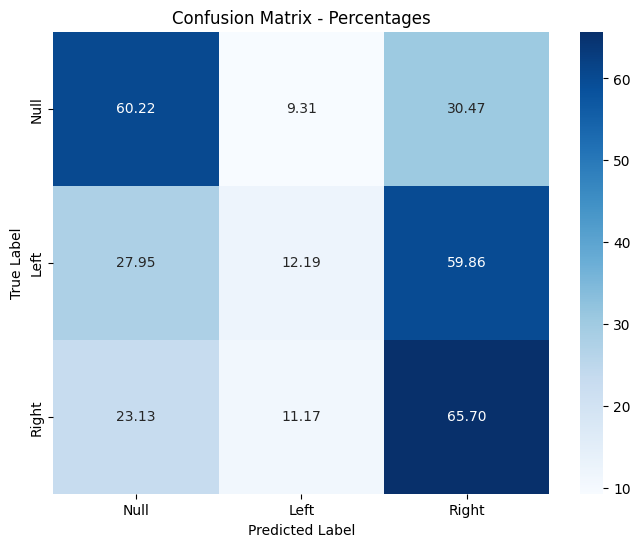

--------------------------------------------------------
Validating with "64 filters" and "1 layers"


Evaluating: 100%|██████████| 47/47 [00:07<00:00,  6.05it/s]


Accuracy: 47.70%


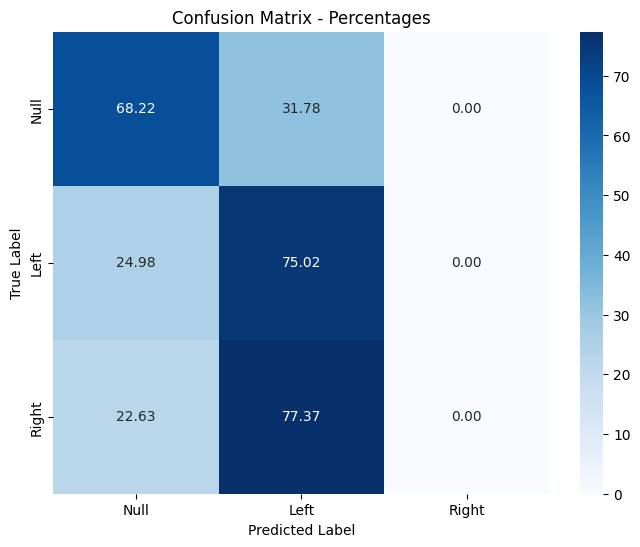

--------------------------------------------------------
Validating with "128 filters" and "1 layers"


Evaluating: 100%|██████████| 47/47 [00:05<00:00,  8.01it/s]

Accuracy: 48.87%


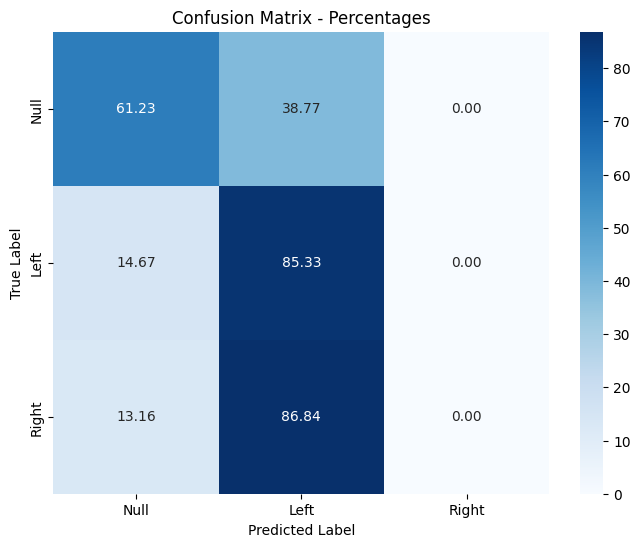

--------------------------------------------------------
Validating with "32 filters" and "2 layers"


Evaluating: 100%|██████████| 47/47 [00:03<00:00, 11.81it/s]

Accuracy: 52.93%


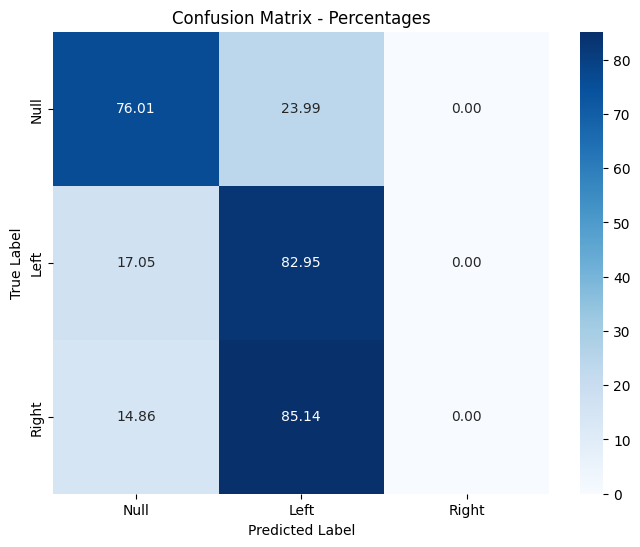

--------------------------------------------------------
Validating with "64 filters" and "2 layers"


Evaluating: 100%|██████████| 47/47 [00:05<00:00,  8.90it/s]

Accuracy: 53.23%


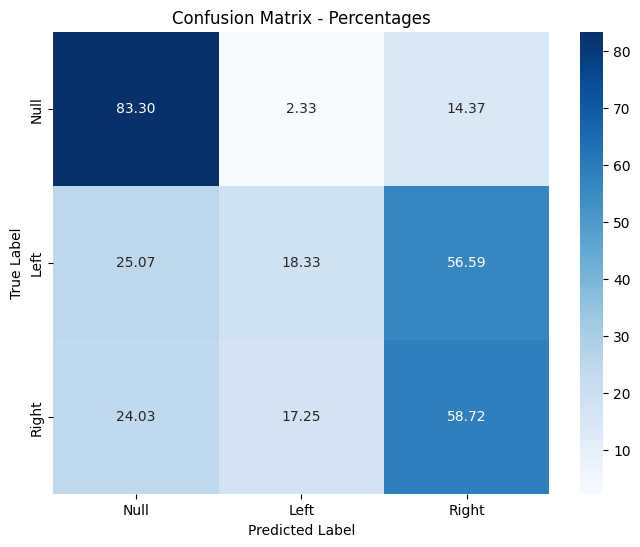

--------------------------------------------------------
Validating with "128 filters" and "2 layers"


Evaluating: 100%|██████████| 47/47 [00:21<00:00,  2.18it/s]

Accuracy: 56.63%


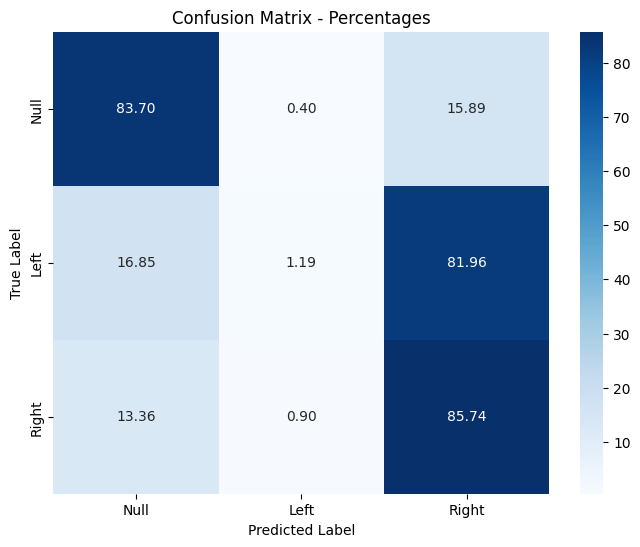

--------------------------------------------------------
Validating with "32 filters" and "4 layers"


Evaluating: 100%|██████████| 47/47 [00:05<00:00,  8.93it/s]

Accuracy: 55.47%


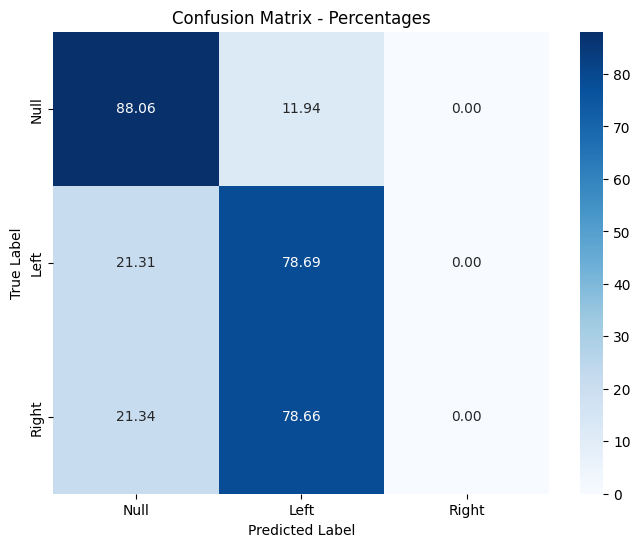

--------------------------------------------------------
Validating with "64 filters" and "4 layers"


Evaluating: 100%|██████████| 47/47 [01:23<00:00,  1.78s/it]

Accuracy: 50.03%


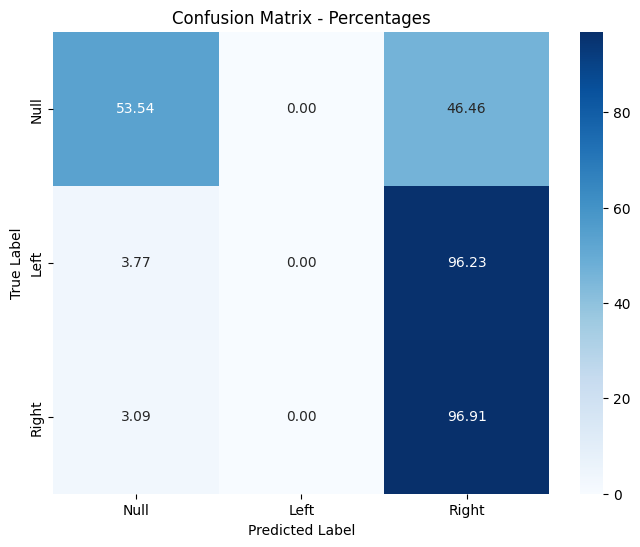

In [6]:
class_labels = [0, 1, 2]  # Assuming 0 represents null, 1 represents left hand, and 2 represents right hand
for idx, model in enumerate(saved_models):
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")
    print(f"Validating with \"{filters} filters\" and \"{num_layers} layers\"")
    with torch.no_grad():
        correct_predictions = 0
        true_labels = []
        predicted_labels = []
        device = torch.device("cuda")

        # Wrap the loop with tqdm to add a progress bar
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())

            for idx, output in enumerate(outputs):
                predicted_label = torch.argmax(output)
                predicted_labels.append(predicted_label.item())

                # print(f"True Label: {labels[idx]}, Predicted Label: {predicted_label.item()}")

                if predicted_label.item() == labels[idx]:
                    correct_predictions += 1

        accuracy = correct_predictions / val_size
        print(f"Accuracy: {accuracy * 100:.2f}%")

    # Convert true and predicted labels to numpy arrays
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)


    # Create confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

    # Normalize the confusion matrix to get percentages
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=["Null", "Left", "Right"], yticklabels=["Null", "Left", "Right"])
    plt.title('Confusion Matrix - Percentages')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
